# General Overview - Statistical Analysis

* We want to analyze the variables in this dataset to understand any relationships between them and their overall effects.
* To do this,
        * `Chi-square test` for categorical variables relationship
        * We have to analyze numerical variables using `analysis of variance` or `ANOVA test`.
* The purpose of these tests is to determine whether there is a statistically significant relationship between the target variable, readmissions and independent variable. Our p-value is 0.01, if anything above that, we cannot reject the null hypothesis.
* A machine learning model can interpret integers as well as process strings, so we must transform all categorical variables using dummy variables as numeric variables. This takes the string values ​​in a variable and converts them to columns labeled 0 or 1 relative to the string. We will also standardize the original numerical variables with a mean of 0 and a standard deviation of 1.
* Finally, we look at the correlation coefficients between the independent variables to make sure they do not have a strong influence on each other. The threshold we used is -0.7 <x <0.7.



### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from pylab import rcParams
rcParams['figure.figsize'] = 12,6

# to avoid warnings
import warnings
warnings.filterwarnings('ignore')
warnings.warn("this will not show")

sns.set(style='darkgrid')
%matplotlib inline

import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import chi2_contingency
from numpy.random import seed
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [2]:
data = pd.read_csv('diabetic_data_cleaned.csv', index_col=0) # import data
df = data.copy() # save a copy of data as diabetes

In [3]:
features = pd.read_csv('features.csv',index_col='Unnamed: 0')
info = lambda attribute:print(f"{attribute.upper()} : {features[features['Feature']==attribute]['Description'].values[0]}\n")

In [4]:
def summary(df, pred=None):
    obs = df.shape[0]
    Types = df.dtypes
    Counts = df.apply(lambda x: x.count())
    Min = df.min()
    Max = df.max()
    Uniques = df.apply(lambda x: x.unique().shape[0])
    Nulls = df.apply(lambda x: x.isnull().sum())
    print('Data shape:', df.shape)

    if pred is None:
        cols = ['Types', 'Counts', 'Uniques', 'Nulls', 'Min', 'Max']
        str = pd.concat([Types, Counts, Uniques, Nulls, Min, Max], axis = 1, sort=True)

    str.columns = cols
    print('___________________________\nData Types:')
    print(str.Types.value_counts())
    print('___________________________')
    return str

summary(df)

Data shape: (64395, 35)
___________________________
Data Types:
object    27
int64      8
Name: Types, dtype: int64
___________________________


,Types,Counts,Uniques,Nulls,Min,Max
A1Cresult,object,64395,4,0,>7,Norm
acarbose,object,64395,3,0,No,Up
age,object,64395,10,0,[0-10),[90-100)
change,object,64395,2,0,Ch,No
chlorpropamide,object,64395,4,0,Down,Up
diabetesMed,object,64395,2,0,No,Yes
diag_1,object,64395,9,0,Circulatory,Respiratory
gender,object,64395,2,0,Female,Male
glimepiride,object,64395,4,0,Down,Up
glipizide,object,64395,4,0,Down,Up


In [5]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
time_in_hospital,64395.0,4.14,2.77,1.0,2.0,3.0,6.0,13.0
num_lab_procedures,64395.0,42.53,19.84,1.0,30.0,44.0,57.0,103.0
num_procedures,64395.0,1.39,1.72,0.0,0.0,1.0,2.0,6.0
num_medications,64395.0,15.11,7.20,1.0,10.0,14.0,19.0,40.0
number_outpatient,64395.0,0.17,0.54,0.0,0.0,0.0,0.0,3.0
number_emergency,64395.0,0.06,0.23,0.0,0.0,0.0,0.0,1.0
number_inpatient,64395.0,0.12,0.39,0.0,0.0,0.0,0.0,2.0
number_diagnoses,64395.0,7.23,1.97,2.0,6.0,8.0,9.0,9.0


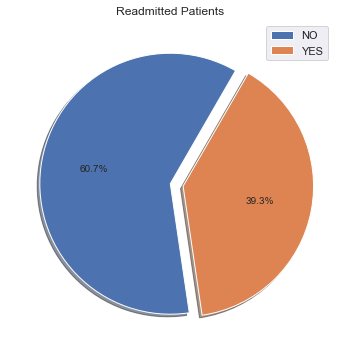

In [6]:
plt.figure(figsize=(6,6))

explode = [0,0.1]
plt.pie(df['readmitted'].value_counts(),explode=explode,autopct='%1.1f%%',shadow=True,startangle=60)
plt.legend(labels=df.readmitted.value_counts().index)
plt.title('Readmitted Patients')
plt.axis('off')
plt.show()

## Feature Selection
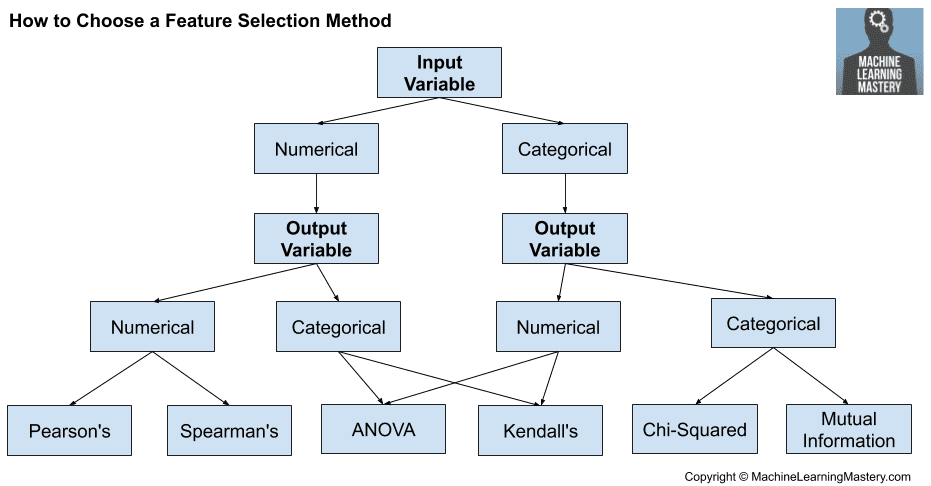

### categorical variables

In [7]:
print('Unique Values of Each Features:\n')
for i in df:
    print(f'{i}:\n{sorted(df[i].unique())}\n')

Unique Values of Each Features:

race:
['AfricanAmerican', 'Asian', 'Caucasian', 'Hispanic', 'Other']

gender:
['Female', 'Male']

age:
['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)', '[60-70)', '[70-80)', '[80-90)', '[90-100)']

time_in_hospital:
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

num_lab_procedures:
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103]

num_procedures:
[0, 1, 2, 3, 4, 5, 6]

num_medications:
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]

number_outpatient:
[0, 1, 2, 3]

number_emergency:


In [9]:
categorical=df.select_dtypes(include='object').columns.tolist()
print(categorical)

['race', 'gender', 'age', 'diag_1', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted']


* The categorical variables are: 
<br>`['race', 'gender', 'age', 'diag_1', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted']`


* We are using the chi-square test for association with a p-value of 0.01 to reject the null hypothesis.

## chi-square test for association

In [10]:
# define a function that returns a table, a chi-square value, and a p value
def chisquare_test(df, var_list, target, null_list=[]):
    for var in var_list:
        print(var.upper())
        chi_test = pd.crosstab(df[var], df[target])
        display(chi_test)
    
        chisq_value, pvalue, dataframe, expected = chi2_contingency(chi_test)
    
        print(f"""Chi-square value: {chisq_value:.2f}
p-value\t\t: {pvalue:.3f}\n""")
        
        if pvalue > 0.01: # adds variables that fail to reject the null hypothesis
            null_list.append(var)
            
    print(f'Fail to reject null hypothesis: {null_list}')

In [11]:
cols_cat = ['race','gender', 'age', 'diag_1', 'max_glu_serum', 'A1Cresult', 'change', 'diabetesMed']
null_list=[]
chisquare_test(df, cols_cat,'readmitted',null_list)

RACE


readmitted,NO,YES
race,,
AfricanAmerican,7467,4558
Asian,330,143
Caucasian,29598,19780
Hispanic,924,483
Other,744,368


Chi-square value: 70.49
p-value		: 0.000

GENDER


readmitted,NO,YES
gender,,
Female,20570,13722
Male,18493,11610


Chi-square value: 14.02
p-value		: 0.000

AGE


readmitted,NO,YES
age,,
[0-10),87,22
[10-20),284,136
[20-30),677,296
[30-40),1659,750
[40-50),4027,2137
[50-60),7180,4079
[60-70),8715,5669
[70-80),9316,7123
[80-90),5958,4525


Chi-square value: 423.44
p-value		: 0.000

DIAG_1


readmitted,NO,YES
diag_1,,
Circulatory,11373,8161
Diabetes,2927,2088
Digestive,3747,2305
Genitourinary,2002,1223
Injury,2654,1631
Musculoskeletal,2455,1311
Neoplasms,1760,760
Other,6806,4234
Respiratory,5339,3619


Chi-square value: 199.49
p-value		: 0.000

MAX_GLU_SERUM


readmitted,NO,YES
max_glu_serum,,
>200,492,372
>300,367,314
None,37263,24033
Norm,941,613


Chi-square value: 18.53
p-value		: 0.000

A1CRESULT


readmitted,NO,YES
A1Cresult,,
>7,1612,996
>8,3349,2151
None,31861,20938
Norm,2241,1247


Chi-square value: 22.60
p-value		: 0.000

CHANGE


readmitted,NO,YES
change,,
Ch,16470,11781
No,22593,13551


Chi-square value: 117.57
p-value		: 0.000

DIABETESMED


readmitted,NO,YES
diabetesMed,,
No,10601,5366
Yes,28462,19966


Chi-square value: 291.97
p-value		: 0.000

Fail to reject null hypothesis: []


> Based on the chi-square value and p-value, we can safely say that there is no relation between the independent variables and the target variable.

### medications

In [12]:
medications = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 
            'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 
               'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 
               'insulin', 'glyburide-metformin', 'glipizide-metformin', 'metformin-pioglitazone']
chisquare_test(df, medications,'readmitted', null_list)

METFORMIN


readmitted,NO,YES
metformin,,
Down,234,147
No,30687,20189
Steady,7674,4723
Up,468,273


Chi-square value: 12.55
p-value		: 0.006

REPAGLINIDE


readmitted,NO,YES
repaglinide,,
Down,15,11
No,38628,24921
Steady,382,373
Up,38,27


Chi-square value: 32.69
p-value		: 0.000

NATEGLINIDE


readmitted,NO,YES
nateglinide,,
Down,5,3
No,38801,25136
Steady,248,188
Up,9,5


Chi-square value: 2.72
p-value		: 0.437

CHLORPROPAMIDE


readmitted,NO,YES
chlorpropamide,,
Down,1,0
No,39026,25302
Steady,36,27
Up,0,3


Chi-square value: 5.60
p-value		: 0.133

GLIMEPIRIDE


readmitted,NO,YES
glimepiride,,
Down,66,58
No,37072,23987
Steady,1805,1213
Up,120,74


Chi-square value: 3.98
p-value		: 0.263

GLIPIZIDE


readmitted,NO,YES
glipizide,,
Down,166,155
No,34449,21813
Steady,4159,3145
Up,289,219


Chi-square value: 63.77
p-value		: 0.000

GLYBURIDE


readmitted,NO,YES
glyburide,,
Down,199,169
No,34929,22386
Steady,3613,2537
Up,322,240


Chi-square value: 20.68
p-value		: 0.000

TOLBUTAMIDE


readmitted,NO,YES
tolbutamide,,
No,39050,25327
Steady,13,5


Chi-square value: 0.58
p-value		: 0.446

PIOGLITAZONE


readmitted,NO,YES
pioglitazone,,
Down,35,35
No,36336,23309
Steady,2611,1909
Up,81,79


Chi-square value: 27.65
p-value		: 0.000

ROSIGLITAZONE


readmitted,NO,YES
rosiglitazone,,
Down,43,17
No,36682,23486
Steady,2264,1784
Up,74,45


Chi-square value: 43.49
p-value		: 0.000

ACARBOSE


readmitted,NO,YES
acarbose,,
No,38977,25243
Steady,82,83
Up,4,6


Chi-square value: 10.13
p-value		: 0.006

MIGLITOL


readmitted,NO,YES
miglitol,,
Down,0,1
No,39056,25320
Steady,7,10
Up,0,1


Chi-square value: 5.79
p-value		: 0.122

TROGLITAZONE


readmitted,NO,YES
troglitazone,,
No,39062,25330
Steady,1,2


Chi-square value: 0.14
p-value		: 0.705

TOLAZAMIDE


readmitted,NO,YES
tolazamide,,
No,39043,25323
Steady,20,9


Chi-square value: 0.53
p-value		: 0.468

INSULIN


readmitted,NO,YES
insulin,,
Down,3721,2892
No,20076,12111
Steady,11941,7785
Up,3325,2544


Chi-square value: 132.64
p-value		: 0.000

GLYBURIDE-METFORMIN


readmitted,NO,YES
glyburide-metformin,,
Down,3,0
No,38803,25147
Steady,252,184
Up,5,1


Chi-square value: 4.74
p-value		: 0.192

GLIPIZIDE-METFORMIN


readmitted,NO,YES
glipizide-metformin,,
No,39060,25328
Steady,3,4


Chi-square value: 0.33
p-value		: 0.564

METFORMIN-PIOGLITAZONE


readmitted,NO,YES
metformin-pioglitazone,,
No,39062,25332
Steady,1,0


Chi-square value: 0.05
p-value		: 0.827

Fail to reject null hypothesis: ['nateglinide', 'chlorpropamide', 'glimepiride', 'tolbutamide', 'miglitol', 'troglitazone', 'tolazamide', 'glyburide-metformin', 'glipizide-metformin', 'metformin-pioglitazone']


* The medications: nateglinide, chlorpropamide, glimepiride, acetohexamide, glyburide, tolbutamide, miglitol, troglitazone, tolazamide, glyburide-metformin, glipizide-metformin, and metformin-pioglitazone all failed to pass the test since they have p-values greater than 0.01.

* Since these variables are not independent of the target variable, we are removing them from the dataset.

In [13]:
print(null_list)

['nateglinide', 'chlorpropamide', 'glimepiride', 'tolbutamide', 'miglitol', 'troglitazone', 'tolazamide', 'glyburide-metformin', 'glipizide-metformin', 'metformin-pioglitazone']


In [14]:
# drop columns that do not pass the p-value test
df = df.drop(columns=null_list)

# numerical variables

## statistical testing - analysis of variance (ANOVA)

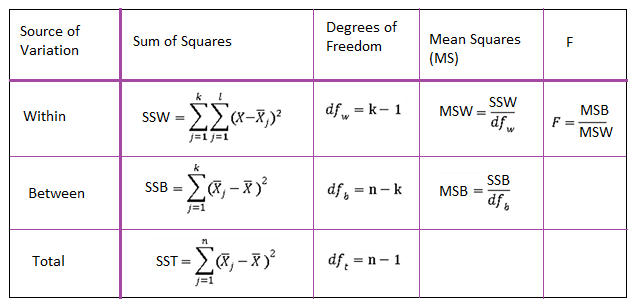

In [15]:
# The numerical variables 
numerical=df.select_dtypes(include=['int64','float']).columns.tolist()
print(numerical)

['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']


* Using the analysis of variance (ANOVA) test, we want to determine if there is a statistically significant relationship between a numerical variable and the categorical target variable. Our p-value threshold is 0.01.

In [16]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
time_in_hospital,64395.0,4.14,2.77,1.0,2.0,3.0,6.0,13.0
num_lab_procedures,64395.0,42.53,19.84,1.0,30.0,44.0,57.0,103.0
num_procedures,64395.0,1.39,1.72,0.0,0.0,1.0,2.0,6.0
num_medications,64395.0,15.11,7.20,1.0,10.0,14.0,19.0,40.0
number_outpatient,64395.0,0.17,0.54,0.0,0.0,0.0,0.0,3.0
number_emergency,64395.0,0.06,0.23,0.0,0.0,0.0,0.0,1.0
number_inpatient,64395.0,0.12,0.39,0.0,0.0,0.0,0.0,2.0
number_diagnoses,64395.0,7.23,1.97,2.0,6.0,8.0,9.0,9.0


In [17]:
# define a function that performs the ANOVA test and returns a table
def anova_table(var_list, null_list=[]):
    for var in var_list:
        print(var.upper())
        
        anova = ols('time_in_hospital ~ {}'.format(var), data=df).fit()
        table = sm.stats.anova_lm(anova, typ=2)
        pvalue=table['PR(>F)'][0]
        if pvalue > 0.01: # adds variables that fail to reject the null hypothesis
            null_list.append(var)
        display(table)
    print(f'Fail to reject null hypothesis: {null_list}')

In [18]:
anova_vars = ['readmitted']+numerical
anova_table(anova_vars)

READMITTED


,sum_sq,df,F,PR(>F)
readmitted,1814.955732,1.0,236.76566,2.483360e-53
Residual,493612.310825,64393.0,NaN,NaN


TIME_IN_HOSPITAL


,sum_sq,df,F,PR(>F)
time_in_hospital,4.954273e+05,1.0,6.680383e+31,0.0
Residual,4.775482e-22,64393.0,NaN,NaN


NUM_LAB_PROCEDURES


,sum_sq,df,F,PR(>F)
num_lab_procedures,50434.915447,1.0,7298.227716,0.0
Residual,444992.351111,64393.0,NaN,NaN


NUM_PROCEDURES


,sum_sq,df,F,PR(>F)
num_procedures,10790.223457,1.0,1433.680873,2.651217e-310
Residual,484637.043101,64393.0,NaN,NaN


NUM_MEDICATIONS


,sum_sq,df,F,PR(>F)
num_medications,98674.181569,1.0,16014.813279,0.0
Residual,396753.084989,64393.0,NaN,NaN


NUMBER_OUTPATIENT


,sum_sq,df,F,PR(>F)
number_outpatient,338.114650,1.0,43.976356,3.349836e-11
Residual,495089.151908,64393.0,NaN,NaN


NUMBER_EMERGENCY


,sum_sq,df,F,PR(>F)
number_emergency,1.963046,1.0,0.255147,0.613476
Residual,495425.303512,64393.0,NaN,NaN


NUMBER_INPATIENT


,sum_sq,df,F,PR(>F)
number_inpatient,1940.163289,1.0,253.163525,6.814176e-57
Residual,493487.103269,64393.0,NaN,NaN


NUMBER_DIAGNOSES


,sum_sq,df,F,PR(>F)
number_diagnoses,26297.722016,1.0,3609.640948,0.0
Residual,469129.544542,64393.0,NaN,NaN


Fail to reject null hypothesis: ['number_emergency']


> Based on the ANOVA test, we can drop the number of emergency visits since we cannot reject the null hypothesis that the averages for each class are similar, the p-value is greater than our threshold of 0.01.

In [19]:
# drop number_emergency column
df = df.drop(columns=['number_emergency'])

# One Hot Encoding

Binary columns will be replaced with 0 for No and 1 for Yes. In the gender column, Male and Female will be replaced with 0 and 1 respectively.

In [20]:
# Unique Values of Each Features
for i in df:
    print(f'{i}:\n{sorted(df[i].unique())}\n')

race:
['AfricanAmerican', 'Asian', 'Caucasian', 'Hispanic', 'Other']

gender:
['Female', 'Male']

age:
['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)', '[60-70)', '[70-80)', '[80-90)', '[90-100)']

time_in_hospital:
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

num_lab_procedures:
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103]

num_procedures:
[0, 1, 2, 3, 4, 5, 6]

num_medications:
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]

number_outpatient:
[0, 1, 2, 3]

number_inpatient:
[0, 1, 2]

diag_1:
['Circulatory'

In [21]:
df_dummy = pd.get_dummies(df,drop_first=True)
df_dummy.head()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_inpatient,number_diagnoses,race_Asian,race_Caucasian,race_Hispanic,...,rosiglitazone_Steady,rosiglitazone_Up,acarbose_Steady,acarbose_Up,insulin_No,insulin_Steady,insulin_Up,change_No,diabetesMed_Yes,readmitted_YES
0,3,59,0,18,0,0,9,0,1,0,...,0,0,0,0,0,0,1,0,1,1
1,2,11,5,13,2,1,6,0,0,0,...,0,0,0,0,1,0,0,1,1,0
2,2,44,1,16,0,0,7,0,1,0,...,0,0,0,0,0,0,1,0,1,0
3,1,51,0,8,0,0,5,0,1,0,...,0,0,0,0,0,1,0,0,1,0
4,3,31,6,16,0,0,9,0,1,0,...,0,0,0,0,0,1,0,1,1,1


# Are the features that affect readmissions correlated with each other?

If the correlation value is greater than 0.7 or less than -0.7, we have to drop one of the two columns.

The correlation map is quite large for this notebook. Instead, we are going to find each correlation coefficient individually and mark the ones that have a coefficient greater than 0.7 or less than -0.7.

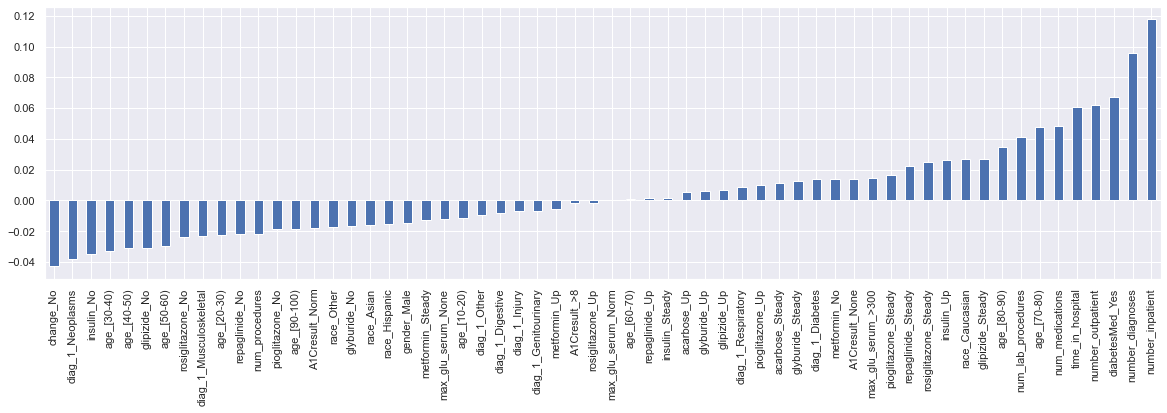

In [22]:
plt.figure(figsize=(20,5))
df_dummy.corr()["readmitted_YES"].sort_values()[:-1].plot.bar();

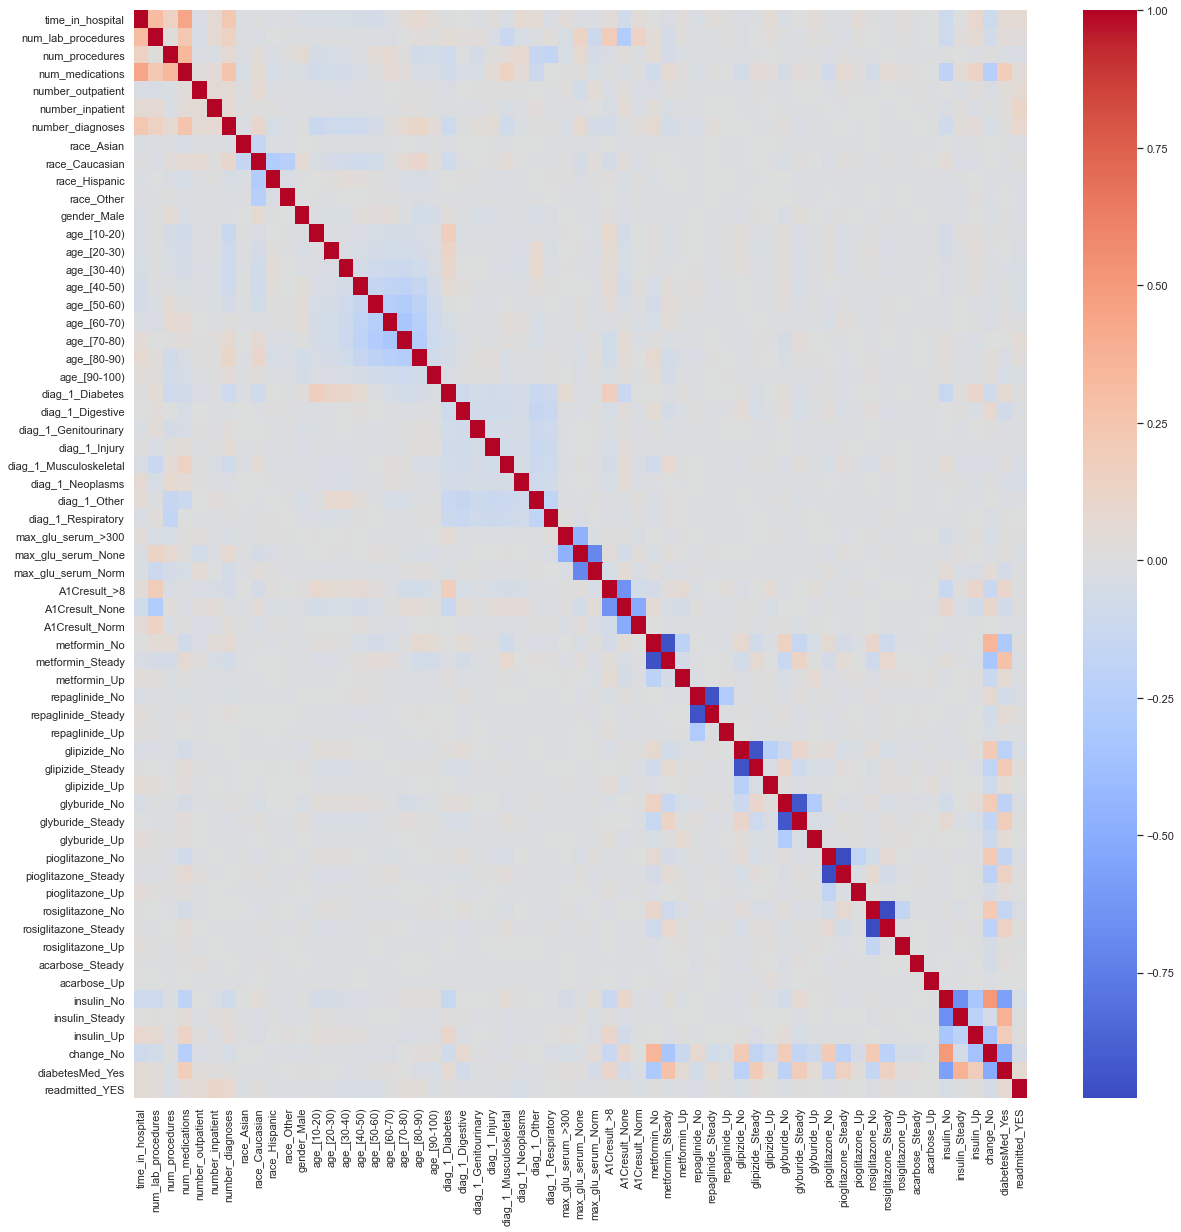

In [28]:
plt.figure(figsize=(20,20))
sns.heatmap(df_dummy.corr(), cmap="coolwarm");

In [23]:
def corrank(X, threshold=0):
    import itertools
    df = pd.DataFrame([[i,j,X.corr().abs().loc[i,j]] for i,j in list(itertools.combinations(X.corr().abs(), 2))],columns=['Feature1','Feature2','corr'])    
    df = df.sort_values(by='corr',ascending=False).reset_index(drop=True)
    return df[df['corr']>threshold]

# prints a descending list of correlation pair (Max on top)
corrank(df_dummy, 0.7)

,Feature1,Feature2,corr
0,rosiglitazone_No,rosiglitazone_Steady,0.977145
1,pioglitazone_No,pioglitazone_Steady,0.973614
2,metformin_No,metformin_Steady,0.947216
3,repaglinide_No,repaglinide_Steady,0.944012
4,glipizide_No,glipizide_Steady,0.940760
5,glyburide_No,glyburide_Steady,0.924540


In [24]:
# Remove the highly collinear features from data
def remove_collinear_features(x, threshold):
    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i+1):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)

            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns=drops)

    return x

In [30]:
#Remove columns having more than 70% correlation
#Both positive and negative correlations are considered here
df_dummy = remove_collinear_features(df_dummy,0.70)

metformin_Steady | metformin_No | 0.95
repaglinide_Steady | repaglinide_No | 0.94
glipizide_Steady | glipizide_No | 0.94
glyburide_Steady | glyburide_No | 0.92
pioglitazone_Steady | pioglitazone_No | 0.97
rosiglitazone_Steady | rosiglitazone_No | 0.98


In [31]:
df_dummy.shape

(64395, 55)

# saving machine learning dataset

In [33]:
# save dataset to new file for machine learning
df_dummy.to_csv('diabetic_data_cleaned_dummy.csv')